# Importing modules and Packages

In [ ]:
import pandas as pd
import json
from textblob import TextBlob

In [21]:
import matplotlib.pyplot as plt

In [ ]:
import extract_dataframe



In [ ]:
_, tweets_list = extract_dataframe.read_json("Economic_Twitter_Data.json")
tweets_list[:5]

In [ ]:
tweet= extract_dataframe.TweetDfExtractor(tweets_list)
tweet_df = tweet.get_tweet_df(True)

In [ ]:
tweet_df.head()

## Data preprocessing 

In [ ]:
from clean_tweets_dataframe import Clean_Tweets

In [ ]:
df_cleaner= Clean_Tweets(tweet_df)

## Drop unwanted columns

In [ ]:
df= df_cleaner.drop_unwanted_column(df_cleaner.df)
df.head()

## Drop duplicates

In [14]:
df = df_cleaner.drop_duplicate(df)

## Convert columns in the dataframe to the correct data types

In [16]:
df= df_cleaner.convert_to_datetime(df)

In [17]:
df =df_cleaner.convert_to_numbers(df)
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:20:18,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,113,355,McMc74078966,3,12,None,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",None
1,2022-04-22 22:19:16,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,113,505,McMc74078966,3,12,None,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",None
2,2022-04-22 22:17:28,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,113,4,McMc74078966,3,12,None,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",None
3,2022-04-22 22:17:20,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,113,332,McMc74078966,3,12,None,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",None
4,2022-04-22 22:13:15,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,113,386,McMc74078966,3,12,None,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",None


In [18]:
df =df_cleaner.remove_non_english_tweets(df)

In [19]:
df.info

<bound method DataFrame.info of                created_at                                             source  \
38    2022-04-22 22:17:05  <a href="http://twitter.com/download/android" ...   
39    2022-04-22 13:44:53  <a href="http://twitter.com/download/android" ...   
41    2022-04-22 06:10:34  <a href="http://twitter.com/download/android" ...   
42    2022-04-21 17:22:09  <a href="http://twitter.com/download/android" ...   
43    2022-04-21 10:32:26  <a href="http://twitter.com/download/android" ...   
...                   ...                                                ...   
24584 2022-04-22 15:22:56  <a href="http://twitter.com/download/iphone" r...   
24586 2022-04-22 15:22:29  <a href="http://twitter.com/download/iphone" r...   
24596 2022-04-22 15:01:27  <a href="http://twitter.com/download/iphone" r...   
24599 2022-04-22 14:58:12  <a href="http://twitter.com/download/iphone" r...   
24622 2022-04-22 14:44:35  <a href="http://twitter.com/download/iphone" r...   

       

In [20]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        created_at  source  original_text  polarity  subjectivity   lang  \
38          False   False          False     False         False  False   
39          False   False          False     False         False  False   
41          False   False          False     False         False  False   
42          False   False          False     False         False  False   
43          False   False          False     False         False  False   
...           ...     ...            ...       ...           ...    ...   
24584       False   False          False     False         False  False   
24586       False   False          False     False         False  False   
24596       False   False          False     False         False  False   
24599       False   False          False     False         False  False   
24622       False   False          False     False         False  False   

       favorite_count  retweet_count 

In [22]:
df.count()

created_at            16374
source                16374
original_text         16374
polarity              16374
subjectivity          16374
lang                  16374
favorite_count        16374
retweet_count         16374
original_author       16374
followers_count       16374
friends_count         16374
possibly_sensitive        0
hashtags              16374
user_mentions         16374
place                 16374
dtype: int64

# Sentiment Analysis

In [27]:
# Categorizes tweets based on their polarity
def PolarityCategories(polarity_text):
    if (polarity_text> 0.5):
        return "positive"
    
    elif (polarity_text< 0.5):
        return "negative"
    
    elif (polarity_text==0.5):
        return "neutral"

In [28]:
df ["polarity_categories"]= df["polarity"].apply(PolarityCategories)
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,polarity_categories
38,2022-04-22 22:17:05,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,12179,43,davideiacovozzi,18,55,None,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",None,negative
39,2022-04-22 13:44:53,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,12179,32,davideiacovozzi,18,55,None,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",None,negative
41,2022-04-22 06:10:34,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,12179,26,davideiacovozzi,18,55,None,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",None,negative
42,2022-04-21 17:22:09,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,12179,213,davideiacovozzi,18,55,None,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",None,negative
43,2022-04-21 10:32:26,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,12179,417,davideiacovozzi,18,55,None,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",None,negative


Text(0, 0.5, '')

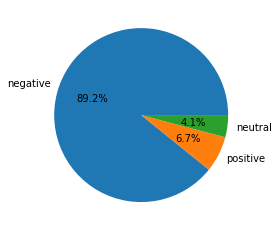

In [29]:
df['polarity_categories'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

In [32]:
## Categorizes tweets based on their subjectivity
def SubjectivityCategories(subjective_text):
    if (subjective_text> 0.5):
        return "subjective"
    
    elif (subjective_text< 0.5):
        return "objective"
    
    elif (subjective_text==0.5):
        return "neutral"

In [33]:
df ["subjectivity_categories"]= df["subjectivity"].apply(SubjectivityCategories)
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,polarity_categories,subjectivity_categories
38,2022-04-22 22:17:05,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,12179,43,davideiacovozzi,18,55,None,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",None,negative,subjective
39,2022-04-22 13:44:53,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,12179,32,davideiacovozzi,18,55,None,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",None,negative,objective
41,2022-04-22 06:10:34,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,12179,26,davideiacovozzi,18,55,None,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",None,negative,objective
42,2022-04-21 17:22:09,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,12179,213,davideiacovozzi,18,55,None,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",None,negative,objective
43,2022-04-21 10:32:26,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,12179,417,davideiacovozzi,18,55,None,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",None,negative,objective


Text(0, 0.5, '')

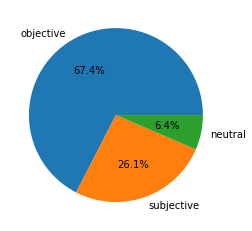

In [34]:
df['subjectivity_categories'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

# Topic modelling